In [2]:
# !pip install xclim 

In [3]:
%matplotlib inline 
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os 
import gcsfs 
from matplotlib import cm
import warnings 

from science_validation_manual import *

In [4]:
import dask
import dask.array as da
import dask.distributed as dd
import rhg_compute_tools.kubernetes as rhgk

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask_gateway/client.py:21: FutureWarning: format_bytes is deprecated and will be removed in a future release. Please use dask.utils.format_bytes instead.
  from distributed.utils import LoopRunner, format_bytes


In [5]:
client, cluster = rhgk.get_standard_cluster()

In [6]:
cluster

In [7]:
def plot_single(ds, variable, metric, data_type, units, raw=False, vmin=240, vmax=320, transform = ccrs.PlateCarree(), xr_func=None):
    """
    plot mean, max, min tasmax, dtr, precip for CMIP6, bias corrected and downscaled data 
    """
    fig, axes = plt.subplots(figsize=(20, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    cmap = cm.cividis 
    
    if raw:
        variable = 'tp'
    
    da = ds[variable]

    if xr_func is not None:
        da = xr_func(da) # some user defined transformation preserving the time dimension

    if metric == 'mean': 
            data = da.mean(dim='time').load()
    elif metric == 'max':
        data = da.max(dim='time').load()
    elif metric == 'min':
        data = da.min(dim='time').load()
    elif isinstance(metric, int):
        data = da.isel({'time': metric})
        metric = f'{metric}_th_time_stamp'
    elif metric == 'q95':
        data = da.quantile(0.95, 'time')
    elif metric == 'q99':
        data = da.quantile(0.99, 'time')

    im = data.plot(cmap=cmap,
                  transform=ccrs.PlateCarree(), add_colorbar=False, vmin=vmin, vmax=vmax)

    axes.coastlines()
    axes.add_feature(cfeature.BORDERS, linestyle=":")
    axes.set_title('{} {}'.format(metric, data_type))
    fig.colorbar(im)

In [8]:
pr_coarse_ref = read_gcs_zarr('gs://scratch-170cd6ec/91da8e47-b396-4360-b397-ece89f1b777e/e2e-miroc6-pr-8rn7f-2846959676/rechunked.zarr')

pr_fine_ref = read_gcs_zarr('gs://scratch-170cd6ec/91da8e47-b396-4360-b397-ece89f1b777e/e2e-miroc6-pr-8rn7f-587431548/rechunked.zarr')

pr_cleaned_ref = read_gcs_zarr('gs://clean-b1dbca25/reanalysis/ERA-5/F320/pr.1995-2015.F320.zarr')

pr_cleaned_ref_old = read_gcs_zarr('gs://scratch-170cd6ec/d56a0ccf-1c45-4d1e-9fd6-3264742c9f9c/e2e-pr-jobs-b2q9d-25364420/rechunked.zarr')

pr_raw_ref = read_gcs_zarr('gs://impactlab-data/climate/source_data/ERA-5/downscaling/pr.1994-2015.F320.v5.zarr')

# pr_ref_nick = read_gcs_zarr('/gcs/impactlab-data/climate/source_data/ERA-5/precip/daily/netcdf/ERA5_tp_CONUS_daily_197901_201912.nc')

In [ ]:
pr_coarse_other = read_gcs_zarr('gs://scratch-170cd6ec/91da8e47-b396-4360-b397-ece89f1b777e/e2e-miroc6-pr-8rn7f-2846959676/rechunked.zarr')

/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/srv/conda/envs/notebook/lib/python3.8/si

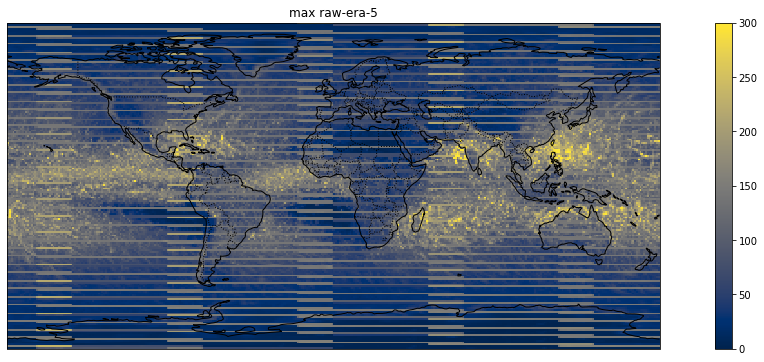

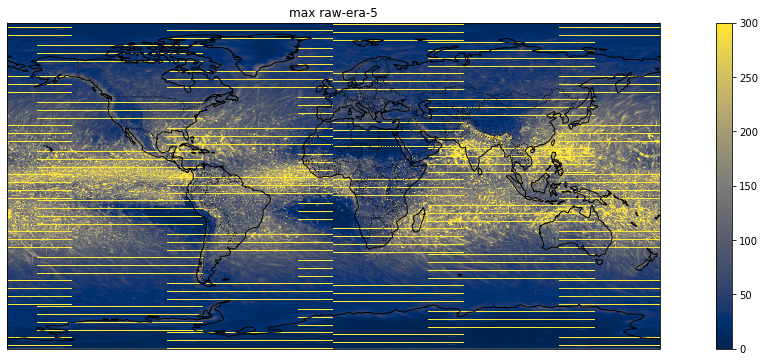

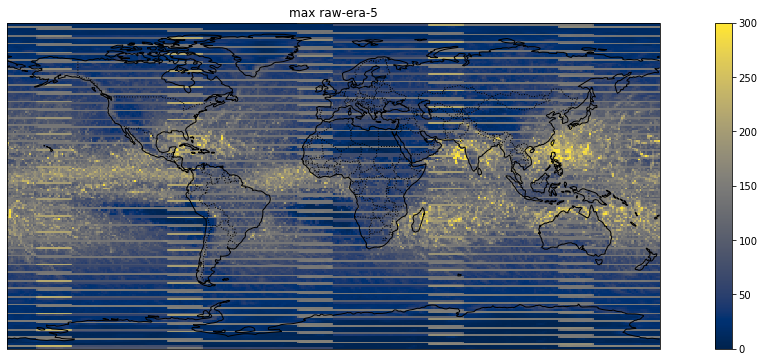

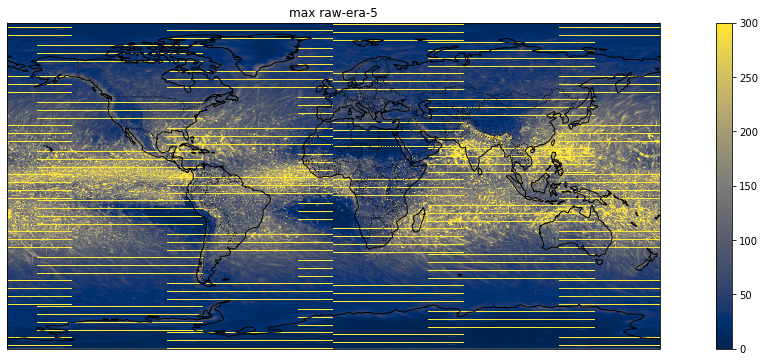

In [22]:
'''plot_single(ds=read_gcs_zarr(data_dict['coarse']['ERA-5']),
                              variable=variable,
                              metric='max',
                              data_type='raw-era-5', 
                              units=units, 
                              vmin=0,
                              vmax=300,
                              xr_func=None)'''

plot_single(pr_coarse_ref,
                              variable='pr',
                              metric='max',
                              data_type='raw-era-5', 
                              units='mm', 
                              vmin=0,
                              vmax=300,
                              xr_func=None)

plot_single(pr_cleaned_ref,
                              variable='pr',
                              metric='max',
                              data_type='raw-era-5', 
                              units='mm', 
                              vmin=0,
                              vmax=300,
                              xr_func=None)

plot_single(pr_cleaned_ref_old,
                              variable='pr',
                              metric='max',
                              data_type='raw-era-5', 
                              units='mm', 
                              vmin=0,
                              vmax=300,
                              xr_func=None)

plot_single(pr_raw_ref,
                              variable='pr',
                              metric='max',
                              data_type='raw-era-5', 
                              units='mm', 
                              raw=True, 
                              vmin=0,
                              vmax=300,
                              xr_func=None)


In [19]:
tasmax_cleaned_ref = read_gcs_zarr('gs://clean-b1dbca25/reanalysis/ERA-5/F320/tasmax.1995-2015.F320.zarr')
dtr_cleaned_ref = read_gcs_zarr('gs://clean-b1dbca25/reanalysis/ERA-5/F320/dtr.1995-2015.F320.zarr')

/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/srv/conda/envs/notebook/lib/python3.8/si

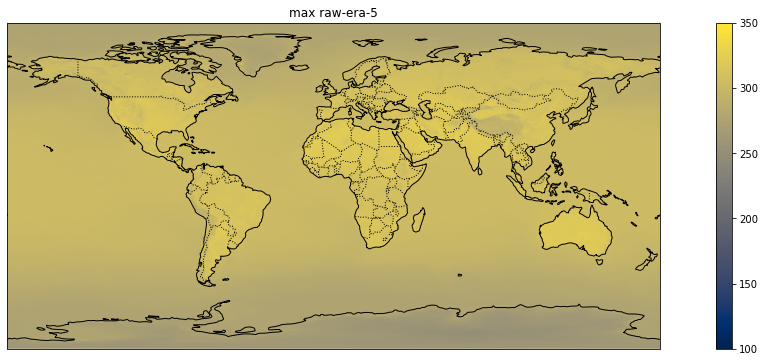

In [18]:
plot_single(tasmax_cleaned_ref,
                              variable='tasmax',
                              metric='max',
                              data_type='raw-era-5', 
                              units='K', 
                              vmin=100,
                              vmax=350,
                              xr_func=None)

/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/srv/conda/envs/notebook/lib/python3.8/si

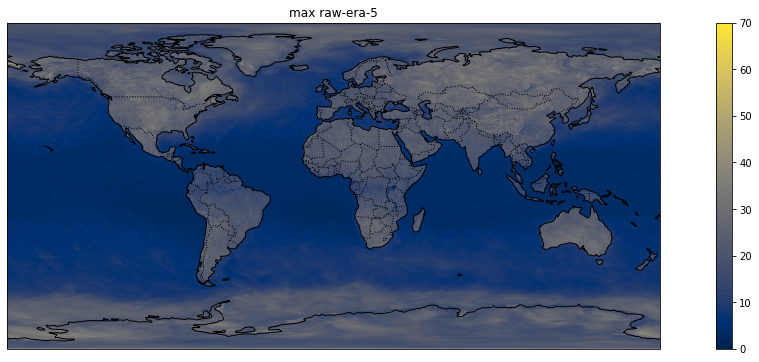

In [20]:
plot_single(dtr_cleaned_ref,
                              variable='dtr',
                              metric='max',
                              data_type='raw-era-5', 
                              units='K', 
                              vmin=0,
                              vmax=70,
                              xr_func=None)

now looking at NetCDF yearly precip data 

In [38]:
! ls -lh /gcs/impactlab-data/climate/source_data/ERA-5/pr/daily/netcdf/v1.3

total 25G
-rw-r--r-- 1 jovyan jovyan 1.2G Jun 14  2021 pr_daily_1994-1994.nc
-rw-r--r-- 1 jovyan jovyan 1.2G Jun 14  2021 pr_daily_1995-1995.nc
-rw-r--r-- 1 jovyan jovyan 1.2G Jun 14  2021 pr_daily_1996-1996.nc
-rw-r--r-- 1 jovyan jovyan 1.2G Jun 14  2021 pr_daily_1997-1997.nc
-rw-r--r-- 1 jovyan jovyan 1.2G Jun 14  2021 pr_daily_1998-1998.nc
-rw-r--r-- 1 jovyan jovyan 1.2G Jun 14  2021 pr_daily_1999-1999.nc
-rw-r--r-- 1 jovyan jovyan 1.2G Jun 14  2021 pr_daily_2000-2000.nc
-rw-r--r-- 1 jovyan jovyan 1.2G Jun 14  2021 pr_daily_2001-2001.nc
-rw-r--r-- 1 jovyan jovyan 1.2G Jun 14  2021 pr_daily_2002-2002.nc
-rw-r--r-- 1 jovyan jovyan 1.2G Jun 14  2021 pr_daily_2003-2003.nc
-rw-r--r-- 1 jovyan jovyan 1.2G Jun 14  2021 pr_daily_2004-2004.nc
-rw-r--r-- 1 jovyan jovyan 1.2G Jun 14  2021 pr_daily_2005-2005.nc
-rw-r--r-- 1 jovyan jovyan 1.2G Jun 14  2021 pr_daily_2006-2006.nc
-rw-r--r-- 1 jovyan jovyan 1.2G Jun 14  2021 pr_daily_2007-2007.nc
-rw-r--r-- 1 jovyan jovyan 1.2G Jun 14  2021 pr_dail

In [89]:
filepath = '/gcs/impactlab-data/climate/source_data/ERA-5/pr/daily/netcdf/v1.3/pr_daily_{year}-{year}.nc'

pr_2000 = xr.open_dataset(filepath.format(year='2015'))

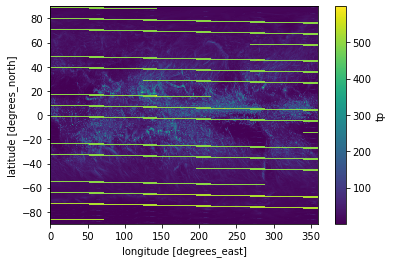

In [90]:
(pr_2000['tp'].max('time') * 1000).plot()

In [71]:
pr_v13 = xr.open_mfdataset('/gcs/impactlab-data/climate/source_data/ERA-5/pr/daily/netcdf/v1.3/pr_daily_200*-200*.nc')

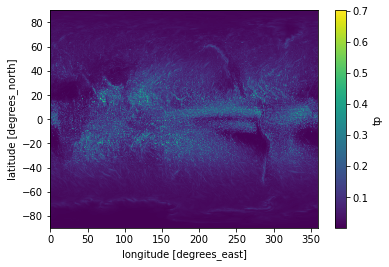

In [72]:
pr_v13['tp'].max('time').plot()

In [49]:
pr_2000['tp'].shape

(365, 640, 1280)

In [51]:
pr_raw_ref['tp'].shape

(8030, 640, 1280)

distributed.client - WARNING - Couldn't gather 1 keys, rescheduling {"('getitem-8655d971352094ce7d9c689ffa364170', 10, 0, 0)": ('tls://10.23.68.4:38711',)}


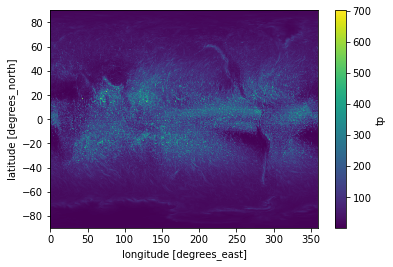

In [94]:
pr_raw_ref['tp'].sel(time=slice("1994", "2014")).max('time').plot()

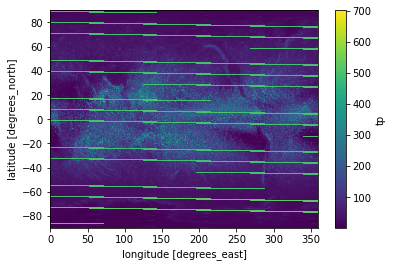

In [95]:
pr_raw_ref['tp'].max('time').plot()

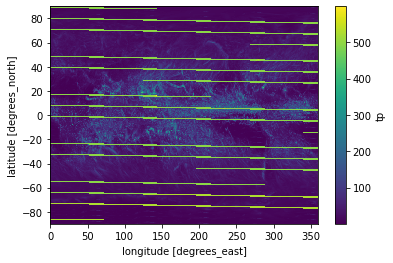

In [99]:
pr_raw_ref['tp'].sel(time=slice("2015-01-16", "2015-12-31")).max('time').plot()

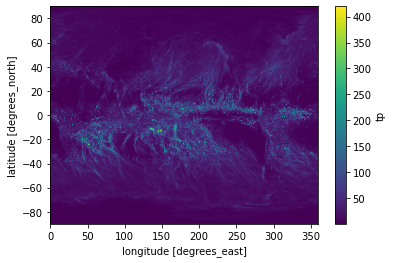

In [131]:
pr_raw_ref['tp'].sel(time=slice("2015-01-01", "2015-03-28")).max('time').plot()

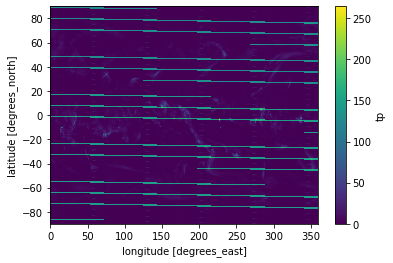

In [132]:
pr_raw_ref['tp'].sel(time=slice("2015-03-29", "2015-03-29")).max('time').plot()

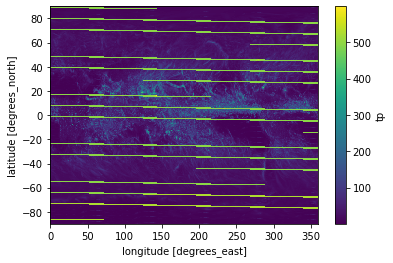

In [133]:
pr_raw_ref['tp'].sel(time=slice("2015-05-01", "2015-12-31")).max('time').plot()

In [105]:
! ls -lh /gcs/impactlab-data/climate/source_data/ERA-5/pr/monthly/netcdf

total 2.0G
-rw-r--r-- 1 jovyan jovyan  52M Oct 20  2020 ERA5_tp_CONUS_monthly_197901_201912.nc
-rw-r--r-- 1 jovyan jovyan 963M Sep 12  2019 precip.nc
-rw-r--r-- 1 jovyan jovyan 963M Oct 16  2019 precip_spi.nc


In [9]:
# note nick depsky precip is monthly and in m so convert to mm
nick_precip = xr.open_dataset('/gcs/impactlab-data/climate/source_data/ERA-5/pr/monthly/netcdf/ERA5_tp_CONUS_monthly_197901_201912.nc')

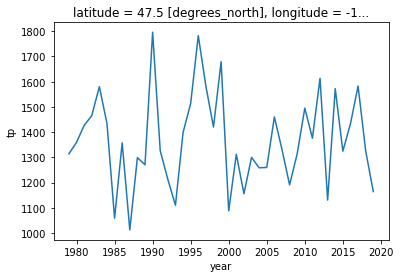

In [10]:
target_lat = 47.608013
target_lon = -122.335167

(nick_precip["tp"].sel(longitude=target_lon, latitude=target_lat, method="nearest").groupby('time.year').sum().load() * 1000).plot()

download some era-5 data 

In [136]:
# ! pip install cdsapi 

In [137]:
import cdsapi 

In [138]:
! pwd

/home/jovyan/downscaling/downscale/notebooks/downscaling_pipeline


In [139]:
c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'format': 'netcdf',
        'product_type': 'monthly_averaged_reanalysis',
        'variable': 'total_precipitation',
        'year': [
            '2000', '2001', '2002',
            '2003', '2004', '2005',
            '2006', '2007', '2008',
            '2009', '2010',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'time': '00:00',
        'area': [
            49, -124, 46,
            -121,
        ],
    },
    '/home/jovyan/era5_pr_monthly_download_debug.nc')

2022-01-03 23:25:09,135 INFO Welcome to the CDS
2022-01-03 23:25:09,136 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2022-01-03 23:25:09,282 INFO Request is queued
2022-01-03 23:25:10,418 INFO Request is running
2022-01-03 23:33:30,186 INFO Request is completed
2022-01-03 23:33:30,187 INFO Downloading https://download-0014.copernicus-climate.eu/cache-compute-0014/cache/data0/adaptor.mars.internal-1641252783.3209045-5533-7-475d981e-8a4c-4a47-bd58-99361273a421.nc to /home/jovyan/era5_pr_monthly_download_debug.nc (45.2K)
2022-01-03 23:33:31,117 INFO Download rate 48.7K/s 


Result(content_length=46316,content_type=application/x-netcdf,location=https://download-0014.copernicus-climate.eu/cache-compute-0014/cache/data0/adaptor.mars.internal-1641252783.3209045-5533-7-475d981e-8a4c-4a47-bd58-99361273a421.nc)

In [13]:
new_pr_monthly = xr.open_dataset('/home/jovyan/era5_pr_monthly_download_debug.nc')

In [14]:
pr_seattle_pipeline = pr_cleaned_ref['pr'].sel(lon=target_lon, lat=target_lat, method="nearest").load()
pr_seattle_pipeline_coarse = pr_coarse_ref['pr'].sel(lon=target_lon, lat=target_lat, method="nearest").load()

In [36]:
pr_seattle_pipeline_fine = pr_fine_ref['pr'].sel(lon=target_lon, lat=target_lat, method="nearest").load()
pr_seattle_pipeline_raw = pr_raw_ref['tp'].sel(longitude=target_lon, latitude=target_lat, method="nearest").load()

In [15]:
pr_seattle_cds_mo_mean = new_pr_monthly['tp'].sel(longitude=target_lon, latitude=target_lat, method="nearest") * 1000

# ERA-5 data is monthly average of daily mean, so each month value is not a "monthly mean" but an avg daily value for that month 
pr_seattle_cds_mo_total = pr_seattle_cds_mo_mean * new_pr_monthly.time.dt.days_in_month

In [47]:
print(pr_coarse_ref['pr'].shape)
print(pr_fine_ref['pr'].shape)
print(pr_raw_ref['tp'].shape)
print(pr_cleaned_ref['pr'].shape)
print(new_pr_monthly['tp'].shape)

(8030, 720, 1440)
(8030, 720, 1440)
(8030, 640, 1280)
(8030, 640, 1280)
(132, 13, 13)


Text(0.5, 1.0, 'Seattle annual precip')

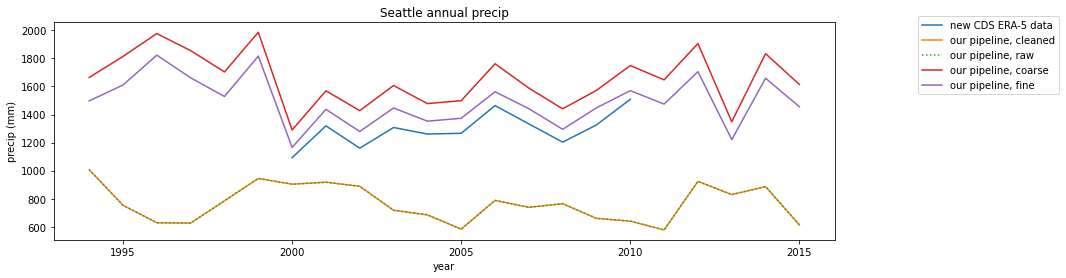

In [52]:
plt.figure(figsize=(14, 4))
pr_seattle_cds_mo_total.groupby('time.year').sum().plot(label='new CDS ERA-5 data')

pr_seattle_pipeline.groupby('time.year').sum().plot(label='our pipeline, cleaned')

pr_seattle_pipeline.groupby('time.year').sum().plot(label='our pipeline, raw', linestyle=':')

pr_seattle_pipeline_coarse.groupby('time.year').sum().plot(label='our pipeline, coarse')

pr_seattle_pipeline_fine.groupby('time.year').sum().plot(label='our pipeline, fine')

plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.ylabel('precip (mm)')
plt.title('Seattle annual precip')

(0.0, 150.0)

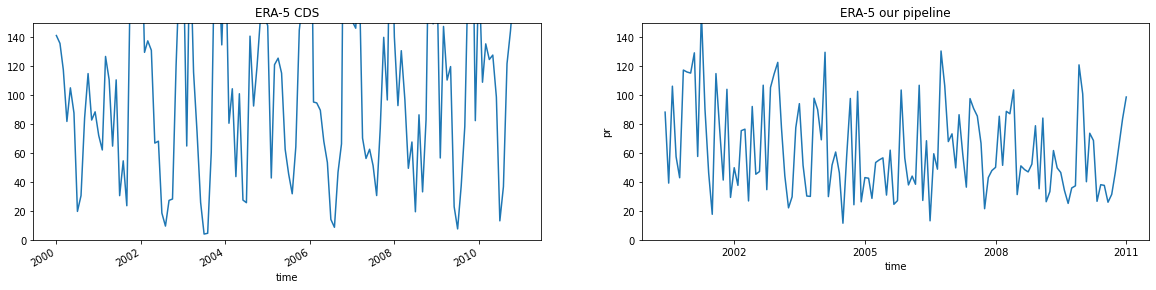

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

# (new_pr_monthly['tp'].sel(longitude=target_lon, latitude=target_lat, method="nearest").groupby('time.year').sum() * 1000).plot(label='cds')
# (nick_precip['tp'].sel(longitude=target_lon, latitude=target_lat, method="nearest").groupby('time.year').sum() * 1000).plot(label='nick')

pr_seattle_cds_mo_total.plot(ax=axes[0], label='cds')

pr_seattle_pipeline.resample(time="1M").sum().sel(time=slice("2000-05-01", "2010-12-31")).plot(ax=axes[1], label='our pipeline')

axes[0].set_title('ERA-5 CDS')

ymax = 150
axes[0].set_ylim([0, ymax])

axes[1].set_title('ERA-5 our pipeline')
axes[1].set_ylim([0, ymax])

In [52]:
print((new_pr_monthly['tp'].sel(longitude=target_lon, latitude=target_lat, method="nearest") * 1000).mean().values)

print(pr_seattle_pipeline.resample(time="1M").mean().sel(time=slice("2000-05-01", "2010-12-31")).mean().values)

3.541675
2.0651534


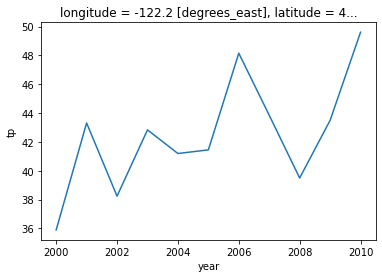

In [150]:
(new_pr_monthly['tp'].sel(longitude=target_lon, latitude=target_lat, method="nearest").groupby('time.year').sum().load() * 1000).plot()